# Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path

['',
 '/Users/wendy9217/anaconda/lib/python35.zip',
 '/Users/wendy9217/anaconda/lib/python3.5',
 '/Users/wendy9217/anaconda/lib/python3.5/plat-darwin',
 '/Users/wendy9217/anaconda/lib/python3.5/lib-dynload',
 '/Users/wendy9217/anaconda/lib/python3.5/site-packages',
 '/Users/wendy9217/anaconda/lib/python3.5/site-packages/Sphinx-1.4.1-py3.5.egg',
 '/Users/wendy9217/anaconda/lib/python3.5/site-packages/aeosa',
 '/Users/wendy9217/anaconda/lib/python3.5/site-packages/six-1.10.0-py3.5.egg',
 '/Users/wendy9217/anaconda/lib/python3.5/site-packages/IPython/extensions',
 '/Users/wendy9217/.ipython']

## Neural Networks with scikit-learn
There is a basic implementation of neural networks in scikit-learn than you can use for prototyping and getting familiar with the concepts. Because it doesn't have GPU support, it's not really appropriate for larger applications.

Neural networks are implemented in the ``MLPClassifier`` and ``MLPRegressor`` classes in the ``sklearn.neural_networks`` module.
There are two standard solvers implemented: ``'adam'`` (the default) and ``'l-bfgs'``. ``'l-bfgs'`` might work better on very small toy datasets.

### Task 1
Create a synthetic "two moons" dataset, and visualize the decision boundary when varying the number of hidden units, the non-linearity, and the random state.
What do you notice?

In [3]:
def plot_2d_classification(classifier, X, ax=None):                                       
                                                                                                            
    eps = X.std() / 2.
    if ax is None:
        ax = plt.gca()                                                                                                           
    
    # create a dense grid of values to evaluate the classifier
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps                                                                      
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps                                                                      
    xx = np.linspace(x_min, x_max, 1000)                                                                                         
    yy = np.linspace(y_min, y_max, 1000)                                                                                         
    X1, X2 = np.meshgrid(xx, yy)                                                                                                 
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    # evaluate the classifier on the grid
    decision_values = classifier.predict(X_grid)
    # show the classification results:
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,                                                           
                                                       y_min, y_max),                                                          
            aspect='auto', origin='lower', alpha=.5)                                                               
    ax.set_xlim(x_min, x_max)                                                                                                    
    ax.set_ylim(y_min, y_max)

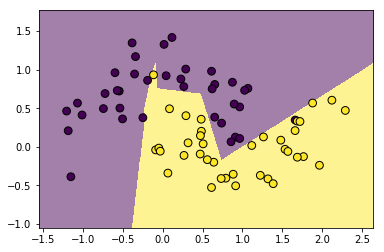

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=0).fit(X_train, y_train)
# todo: create subplots with multiple random states, different non-linearities and different numbers of hidden units
plot_2d_classification(mlp, X)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, edgecolor='k')

### Task 2
Apply ``MLPRegressor`` to the boston housing dataset. Does it do better or worse than Ridge (yesterday).

Try the model with and without scaling the data.

In [5]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# ... solution here

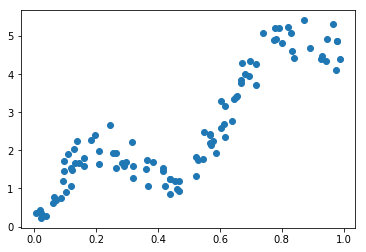

In [6]:
rng = np.random.RandomState(0)
x = np.sort(rng.uniform(size=100))
y = np.sin(10 * x) + 5 * x + np.random.normal(0, .3, size=100)
plt.plot(x, y, 'o')

In [7]:
line = np.linspace(0, 1, 100)
X = x.reshape(-1, 1)

In [8]:
from sklearn.neural_network import MLPRegressor
mlp_relu = MLPRegressor(solver="lbfgs").fit(X, y)
mlp_tanh = MLPRegressor(solver="lbfgs", activation='tanh').fit(X, y)

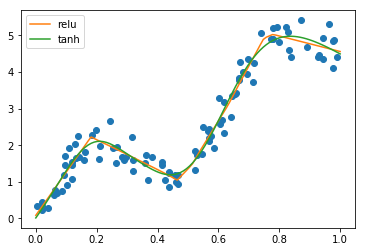

In [9]:
plt.plot(x, y, 'o')
plt.plot(line, mlp_relu.predict(line.reshape(-1, 1)), label="relu")
plt.plot(line, mlp_tanh.predict(line.reshape(-1, 1)), label="tanh")
plt.legend()

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, stratify=digits.target, random_state=0)

In [11]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.98


## Keras
Now let's work with the much more flexible and efficient Keras library (which is using TensorFlow in the backend)
A simple way to work with keras is to build up models using the ``Sequential`` class.

The model below corresponds to mulinomial logistic regression. Run it on the ``digits`` dataset.


In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
# We divide the data by 16 to make sure it's on a reasonable scale (between zero and one)
X_train, X_test, y_train, y_test = train_test_split(digits.data / 16., digits.target, random_state=0)

import keras
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(10, input_shape=(64,)),
    Activation('softmax'),
])

In [14]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


In keras, the ``fit`` method takes options like the number of epochs (iterations) to run, and whether to use a validation set for early stopping.

In [27]:
history_callback = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=.1)

Train on 1212 samples, validate on 135 samples
Epoch 1/10
1212/1212 [==============================] - 0s 70us/step - loss: 1.0905 - acc: 0.8738 - val_loss: 1.0638 - val_acc: 0.8741
Epoch 2/10
1212/1212 [==============================] - 0s 68us/step - loss: 1.0240 - acc: 0.8804 - val_loss: 0.9997 - val_acc: 0.8889
Epoch 3/10
1212/1212 [==============================] - 0s 68us/step - loss: 0.9641 - acc: 0.8952 - val_loss: 0.9443 - val_acc: 0.8963
Epoch 4/10
1212/1212 [==============================] - 0s 68us/step - loss: 0.9110 - acc: 0.8969 - val_loss: 0.8889 - val_acc: 0.8963
Epoch 5/10
1212/1212 [==============================] - 0s 65us/step - loss: 0.8627 - acc: 0.9059 - val_loss: 0.8431 - val_acc: 0.9111
Epoch 6/10
1212/1212 [==============================] - 0s 65us/step - loss: 0.8194 - acc: 0.9117 - val_loss: 0.8007 - val_acc: 0.9111
Epoch 7/10
1212/1212 [==============================] - 0s 66us/step - loss: 0.7803 - acc: 0.9134 - val_loss: 0.7621 - val_acc: 0.9111
Epoch 8/

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.694
Test Accuracy: 0.900


Here is a nice way to visualize the history of training the model:

In [29]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

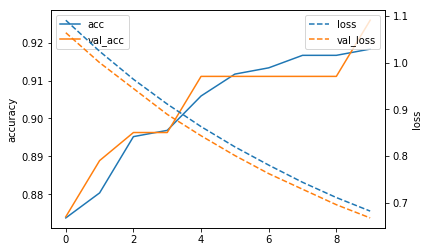

In [30]:
import pandas as pd
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

### Task
Add an additional hidden layer with a ``relu`` non-linearity and fit the new model (``Dense(20, activation='relu')``. Experiment with different layer sizes and different numbers of additional layers.